In [1]:
import pandas as pd
import spacy
from tinydb import TinyDB, Query
import spacy
from collections import defaultdict
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools

In [2]:
db = TinyDB('../4chan_pol_database.json')
spacy_en_core = spacy.load('en_core_web_sm')

In [3]:
initial_keywords =  ["jew","kike","zionist","israel","shylock","yid"]

In [4]:
keyword_threads = []

for thread in db.all():
    if any([True for x in initial_keywords if x in thread["initial_comment"]]):
        keyword_threads.append(thread)
    else:
        continue
        

In [17]:
def remove_stopwords(words):
    all_stopwords = spacy_en_core.Defaults.stop_words
    tokens_without_sw = [word for word in words if not word in all_stopwords]
    return tokens_without_sw
    
def find_coocs(comment,n_gram_range,word):
    comment = remove_stopwords(comment)
    comment_n_grams = list(ngrams(comment,n_gram_range))
    
    coocs = []

    for gram in comment_n_grams:
        if gram[int(n_gram_range/2)] == word:
            coocs.append(list(gram))
    return coocs  

In [18]:
# analyse coocs
keyword_coocs = defaultdict(list)

for kw_thread in keyword_threads:
    
    for word in initial_keywords:
        coocs = find_coocs(kw_thread["initial_comment"],7,word)
        if coocs:
            keyword_coocs[word].append(coocs)
    

In [21]:
print(keyword_coocs)

defaultdict(<class 'list'>, {'israel': [[['concentration', 'camp', 'commander', 'israel', 'protected', "''", 'describitive']], [['laid', 'plan', 'zionism', 'israel', 'th', 'centry', 'shit']], [['.', 'simp', 'palestine', 'israel', 'ur', 'fag', 'kill']], [['whites', 'benefit', 'expanding', 'israel', '.', 'israel', 'grows'], ['expanding', 'israel', '.', 'israel', 'grows', 'stronger', ','], ['refugee', 'sent', 'europe', 'israel', ',', 'zog', 'run'], ['whites', 'blames', 'whites', 'israel', '.', 'palestinians', 'allowed'], ['palestinians', 'allowed', 'home', 'israel', 'wont', 'let', '.'], ['return', 'palestine', ',', 'israel', 'lose', 'influence', 'power']], [['.', 'palestine', '-', 'israel', 'conflict', ',', 'read']], [['sand', 'niggers', '.', 'israel', 'threat', ',', 'palestine'], ['support', 'enemy', 'aggressor', 'israel', '.', 'palestine', 'long'], ['sand', 'niggers.anything', 'means', 'israel', 'empire', 'claiming', 'victim']], [['need', 'existence', 'greater', 'israel', 'order', 'send

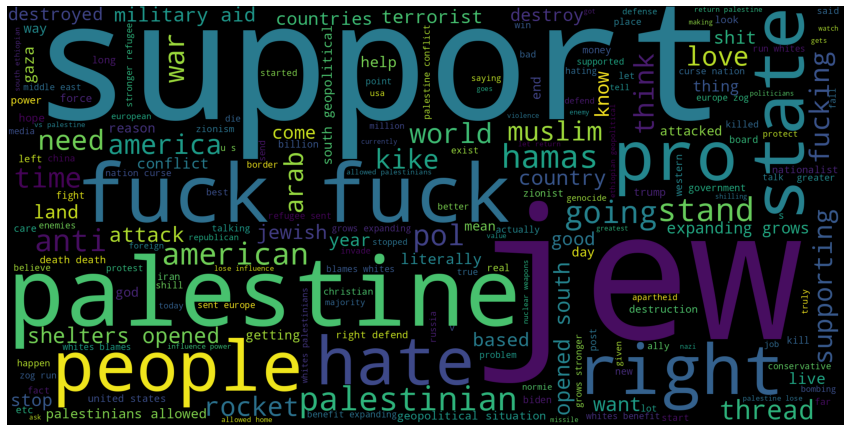

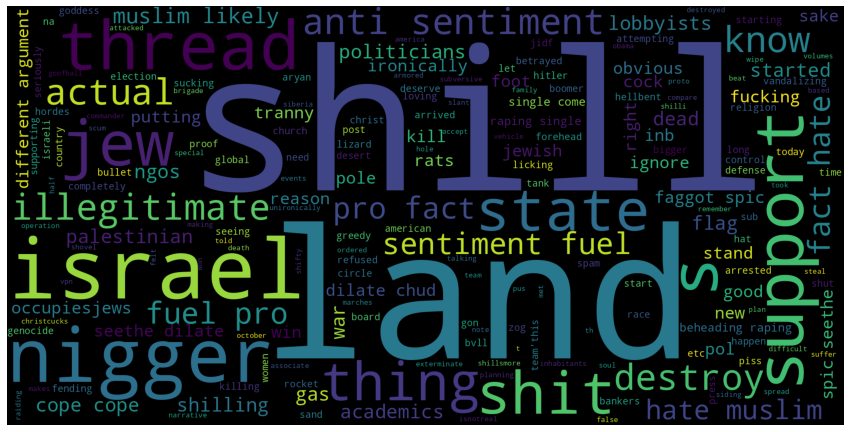

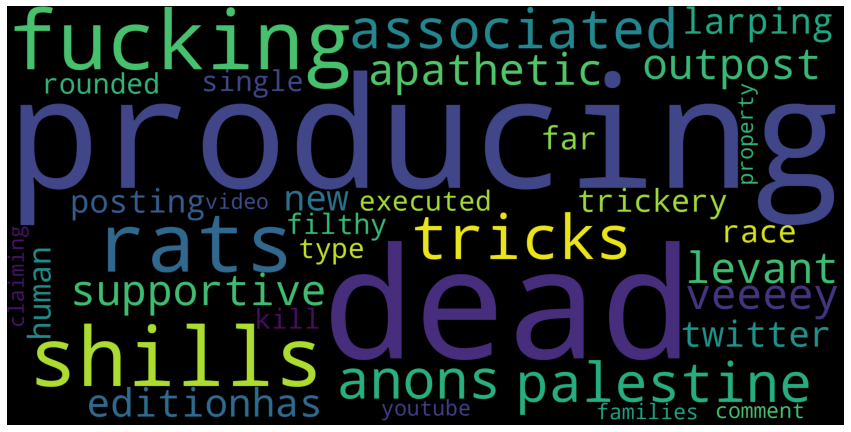

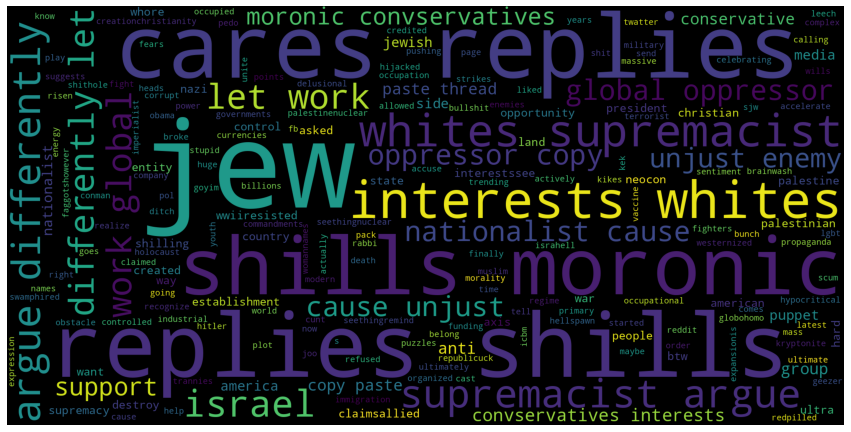

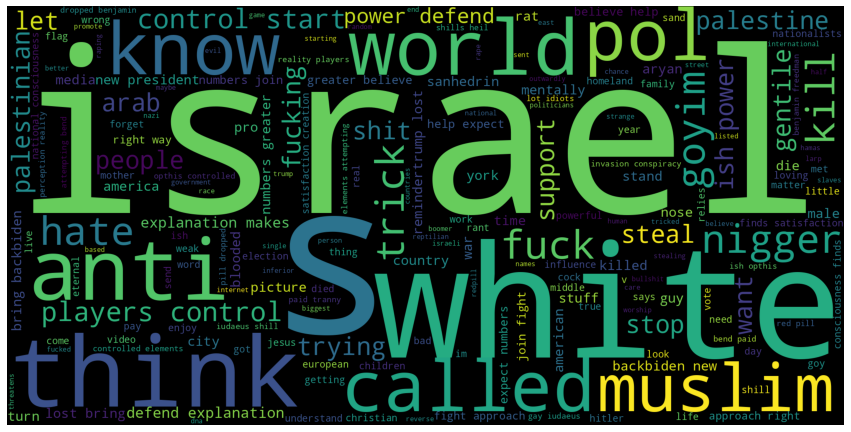

In [33]:
for keyword in keyword_coocs:
    coocs = list(itertools.chain.from_iterable(keyword_coocs[keyword]))
    coocs = list(itertools.chain.from_iterable(coocs))
   
    cooc_string = (" ").join(coocs).replace(keyword,"")  

    wordcloud = WordCloud(width = 2000, height = 1000).generate(cooc_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(keyword+".png", bbox_inches='tight')
    plt.show()
    plt.close()
    

In [ ]:
# identify words

In [ ]:
# search again